In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
from sklearn.datasets import make_blobs

In [12]:
dataset = make_blobs(500, 2, centers=3)

<AxesSubplot:>

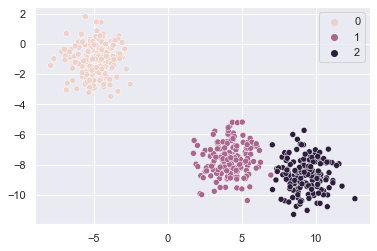

In [26]:
sns.scatterplot(x=dataset[0][:,0], y=dataset[0][:,1],
               hue=dataset[1])

In [51]:
data = np.array(dataset[0:1]).reshape(-1,2)

In [64]:
from sklearn.cluster import KMeans

In [113]:
model = KMeans(n_clusters=3)
model.fit(data)

KMeans(n_clusters=3)

In [188]:
# returns the distance from each centroid
# there are 3 columns cause there are 3 clusters (as it was defined by us)
model.transform(data)

array([[ 1.95496758, 17.3786744 ,  6.89463841],
       [ 5.19412275, 11.00584613,  0.9305961 ],
       [ 2.20055708, 15.84926321,  4.63121021],
       ...,
       [16.33368246,  0.17991807, 11.38805317],
       [ 4.72406467, 12.00760644,  0.86771856],
       [ 0.88763754, 16.7684947 ,  6.01990101]])

In [211]:
model.score(data), model.inertia_
from sklearn.metrics import silhouette_score
silhouette_score(data, model.labels_)

0.7169669428809933

<AxesSubplot:>

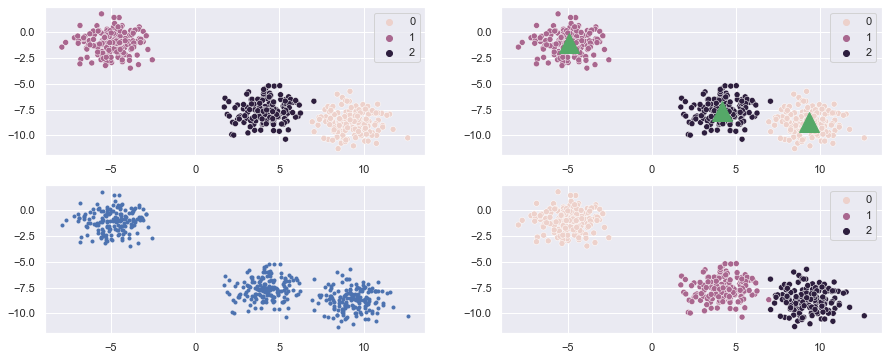

In [115]:
plt.figure(figsize=(15,6))
plt.subplot(221)
sns.scatterplot(x=data[:,0], y=data[:,1], hue=model.labels_)

plt.subplot(222)
sns.scatterplot(x=data[:,0], y=data[:,1], hue=model.labels_)
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'g^', markersize=20)

plt.subplot(223)
plt.plot(data[:,0], data[:,1], '.')

plt.subplot(2,2,4)
sns.scatterplot(x=data[:,0], y=data[:,1], hue=dataset[1])

In [217]:
def visualize(k, data, classification_model):
    from matplotlib.colors import ListedColormap
    from sklearn.metrics import silhouette_score
    inertia = []
    silhouette_scores = []
    cols = 2
    if k/2 == 0:
        rows = k/2
    else:
        rows = k//2+1
    plt.figure(figsize=(15,15))
    
    # range is from 2 cause for silhouette_score we need at least 2 labels.
    for i in range(2, k+2):
        # train the model
        model = classification_model(n_clusters=i)
        model.fit(data)
        
        # append 
        inertia.append(model.inertia_)
        silhouette_scores.append( silhouette_score(data, model.labels_) )
        
        # plotting
        xmin = np.min(data[:,0])
        xmax = np.max(data[:,0])
        ymin = np.min(data[:,1])
        ymax = np.max(data[:,1])
        
        x1s = np.linspace(xmin, xmax, 100)
        x2s = np.linspace(ymin, ymax, 100)
        x1, x2 = np.meshgrid(x1s, x2s)
        X_new = np.c_[x1.ravel(), x2.ravel()]
        y_pred = model.predict(X_new).reshape(x1.shape)
        custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0', "#c9534b", "#a231ee", "#ffe16c"])
        plt.subplot(rows, cols, i-1)
        g = sns.scatterplot(x=data[:,0], y=data[:,1], hue=model.labels_)
        g.legend_.remove()
        plt.contourf(x1, x2, y_pred, alpha=0.5, cmap=custom_cmap)
        
#         plt.subplot(rows, cols, i)
#         sns.scatterplot(x=data[:,0], y=data[:,1], hue=model.labels_)
#         plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'g^', markersize=20)
        
    return [inertia, silhouette_scores]

# Using regular KMeans (which is by default KMeans++)

In [238]:
silhouette_scores

[0.7716950754547733,
 0.7169669428809933,
 0.5508147357427952,
 0.421368146324509,
 0.318801690267012,
 0.32440893747350663,
 0.33737994837689594,
 0.3382790739951157]

The time required by the function is -> 0.8443644046783447



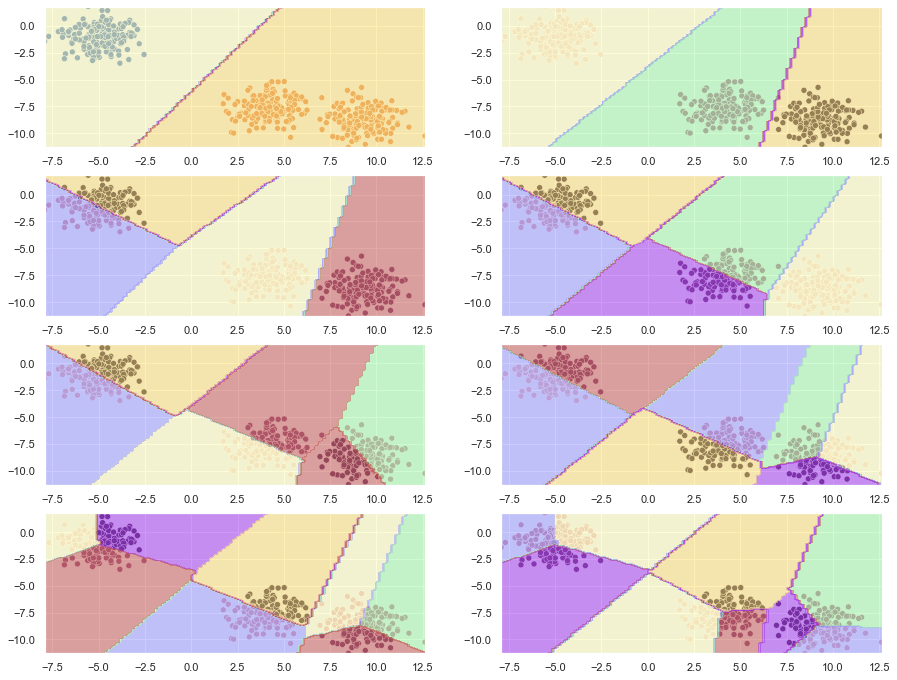

In [218]:
# template for calculating execution time of a function
import time
start_time = time.time()

# function here
inertia, silhouette_scores = visualize(8, data, KMeans)

print(f"The time required by the function is -> {time.time() - start_time}\n")

In [235]:
# plt.plot(range(1,9), inertia)
# plt.xlabel("K")
# plt.ylabel("Inertia")
def plot_best(k, inertia, silhouette_scores):
    plt.figure(figsize=(10,7))
    plt.subplot(121)
    plt.plot(range(2, k+2), inertia)
    plt.xlabel("K")
    plt.ylabel("Inertia")
    
    plt.subplot(122)
    plt.plot(range(2, k+2), silhouette_scores)
    plt.xlabel("K")
    plt.ylabel("silhouette_scores")

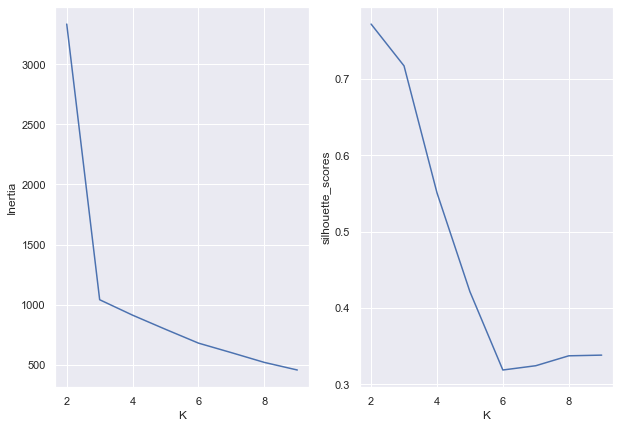

In [236]:
plot_best(8, inertia, silhouette_scores)

In [191]:
np.min(inertia), np.max(inertia)
inertia

[24062.815736647957,
 3332.581563016388,
 1042.701083130537,
 914.3398556666743,
 796.8261601408267,
 680.7682063299947,
 600.1360962896481,
 530.1778784407857]

# Using minibatch KMeans

In [200]:
from sklearn.cluster import MiniBatchKMeans

The time required by the function is -> 0.8448572158813477



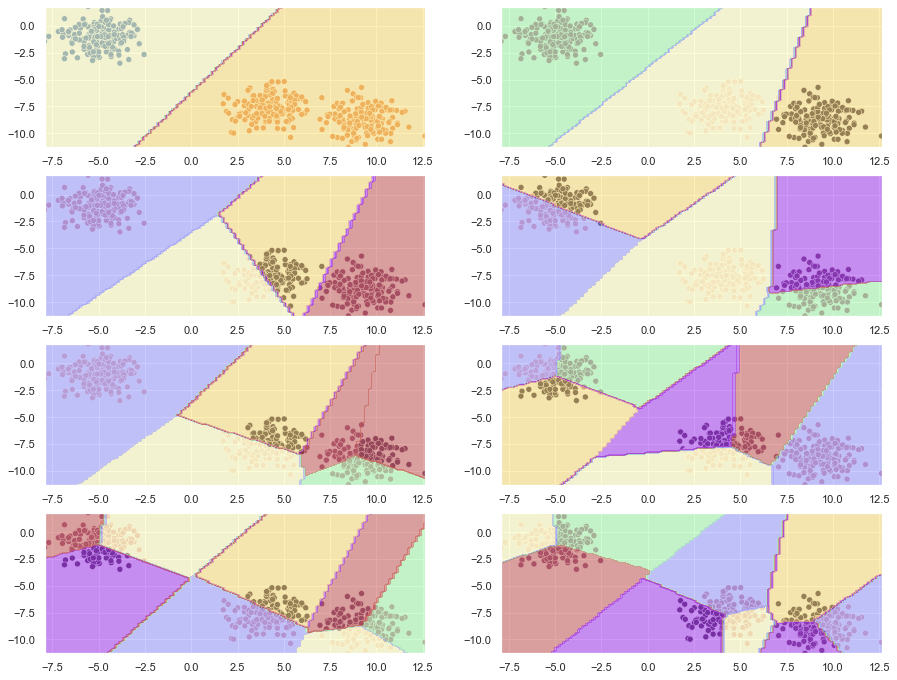

In [240]:
# template for calculating execution time of a function
import time
start_time = time.time()

# function here
inertia, silhouette_scores = visualize(8, data, MiniBatchKMeans)

print(f"The time required by the function is -> {time.time() - start_time}\n")

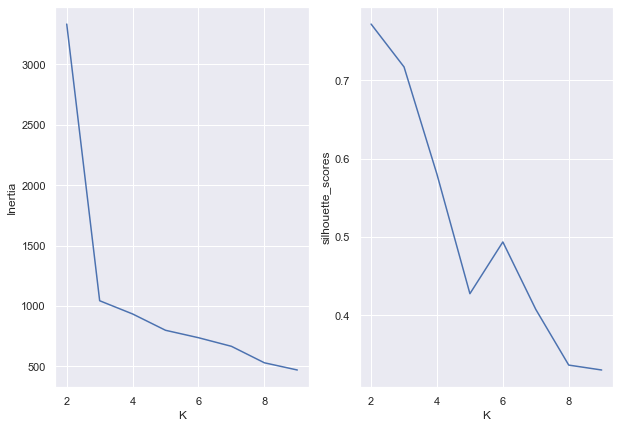

In [241]:
plot_best(8, inertia, silhouette_scores)

## In theory the minibatch kmeans should be faster than the regular KMeans

# Finding the optimal number of clusters

### So which one to choose.Check the silhouette_score graph. According to me choose from the highest 2-3 one. 

# Hierarical Clustring